# Predicting the prevalence of Diabetes using Google Trends online data.

The main goal of this assignment is to set up a machine learning framework that predicts the prevalence of a specific chronic disease (diabetes) from digital records of online behavior (Google Trends).

## Students

1. Giulia Rinaldi
1. Fernando Crema

## Brief explanation of the disease

According to [The Center for Disease Control and Prevention](https://www.cdc.gov/diabetes/basics/index.html) diabetes is a chronic (long-lasting) disease that affects how your body turns food into energy.

There are three main types of diabetes:

1. **Type 1:** Results from the pancreas's failure to produce enough insulin.
1. **Type 2:** Begins with insulin resistance, a condition in which cells fail to respond to insulin properly.
1. **Gestational diabetes:** Occurs when pregnant women without a previous history of diabetes develop high blood sugar levels. 

More than 100 million Americans are living with diabetes (30.3 million) or prediabetes (84.1 million).

### Why diabetes?

Multiple articles such as [Sugar, real heart disease killer](http://www.dailymail.co.uk/health/article-2574269/Sugar-not-fat-real-heart-disease-killer-We-got-wrong-diet-advice-claims-expert.html), [The Sugar Conspiracy](https://www.theguardian.com/society/2016/apr/07/the-sugar-conspiracy-robert-lustig-john-yudkin) and [is fat killing you... or is sugar?](https://www.newyorker.com/magazine/2017/04/03/is-fat-killing-you-or-is-sugar) exploit the issue of sugar consumption in modern society. Despite what normal assuptiom tell us, it seems that the major influence of what are so called "the XXI century diseases" is sugar. Giving the major importance of this topic seems clear that if we focus our analysis into a sugar-related disease as diabetes we would have, at least, a lot of results in the online part of our investigation.

## Focus of this project using past work

We can find important information to our work in several articles. From now on, some of our decisions will be taken into account this projects.

[1] [Detecting influenza epidemics using search engine query data](https://www.nature.com/articles/nature07634.pdf) also found in [Link 2](https://static.googleusercontent.com/media/research.google.com/en//archive/papers/detecting-influenza-epidemics.pdf).

[2] [Composite leading search index: a preprocessing method of internet search data for stock trends prediction](https://link.springer.com/article/10.1007/s10479-014-1779-z).

[3] [A Preprocessing Method of Internet Search Data for Prediction Improvement: Application to Chinese Stock Market](https://www.ecb.europa.eu/events/pdf/conferences/140407/Yuan_APreprocessingMethodOfInternetSearchDataForPredictionImprovement.pdf?3f0ada5a691d67f6febf534056cdc126).

[4] [Monitoring Influenza Epidemics in China with Search Query from Baidu](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0064323).

### Brief explanation of past works

In works [1] and [4] the focus of both projects is to detect influenza epidemics using search query data (using either Google or Baidu). In the case of [1] the importance of the report, according to the authors, is because the early detection of influenza activity, when followed by a rapid response, can reduce the impact of both seasonal and pandemic influenza. As a result, they say that a way to improve early detection is to monitor health-seeking behaviour in the form of queries to online search engines. Furthermore, in [4] they make special emphasis in the type of data they need in order to have successful results: "The search query data for each keyword should be represented as a sequential time series with a daily, weekly or monthly resolution". Finally, they state that studies using web search query data have achieved good results in empirical practice.

Works [2] and [3] are used in work [4] to build the regression model they call **Composite Search Index** and is more or less replicated in the present work

### Possible limitations of our work

1. **(Sample Size):** Unfortunately, we will use data that is temporally aggregated in the **yearly** scale because the data we want to predict found in [the database of the US Center for Disease Control and Prevention](https://www.cdc.gov/brfss/brfssprevalence/index.html) and therefore we will analyze from 2004 to 2016, meaning that we have 13 data points at most.
1. **(Epidemic vs Chronic disease):** One of the major reasons behind the usage of search query data predicting works [1] and [4] is because of the fact that influenza is an **epidemic** type of disease. This means that it can be transmitted. The normal reaction of people is to understand either symptoms, treatment, diagnosis, among others looking for information on internet. We could say that this behaviour should be the same for any other type of diseases. However, is not true as the engagement of people using the platform is directly proportional to the impact of the disease in a given time. Therefore, is easier to see the influence of an epidemic disease as the number of sick people increases rapidly given an epidemic of it. Conversely, later on we will see how the prevalence of diabetes increases over time with a predictable pattern either in Google Trend data or in the so called ground truth data.
1. **(Google Trend data):** In projects [1] and [4] they use **absolute** values of queries (or sampling estimates) to calculate the correlation between the real value (influenza) and the this values. In our case, the Google Trend data represents a normalized estimate from 0 to 100 ( This values can reach 100 in some years of our data) that represents the "importance" of the query term in a given period of time. Therefore, we don't have the real value but an estimated of importance that Google doesn't explain in detail. 

## How this work is structured:

1. Downloading data:
    - Ground Truth Data.
    - Google Trends data:
        * Keyword selection.
        * Keyword filtering.
        * Downloading the data.
    - Data on income and poverty.
1. Correlation study:
    - Correlation between the ground truth data and Google Trends data.
    - Correlation between the ground truth data dn the income-poverty data.
1. Prediction model:
    - Predicting the ground truth data based on Google Trends data.
        * Discussing keyword selection.
        * Model selection using temporal and spatial cross-validation.
        * Generalizability across states and years.
    - Predicting the ground truth data based on Google Trends data and income-poverty data.
    - Predicting the ground truth data based on Google Trends data, income-poverty data and insurance data.

## Ground truth data

### Behavioral Risk Factor Surveillance System

It's possible to download the data from different sources:

1. From [Diabetes Data](https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html) we can find an interactive way with graphs and aggregations by Total, Age, Gender and Education. However, is not consistent with the data found in 2.
1. From 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
years = pd.date_range(start='31/12/2004', end="31/12/2016", freq="365D")

In [4]:
crude_prevalence = []
interest = ["Year", "LocationAbbr", "LocationDesc", "Indicator", "Data_Value", "Low_Confidence_Limit", "High_Confidence_Limit", "Sample_Size"]

for year in years:
    print("Filename: {}".format("data/crude_prevalence/crude_prevalence_{}.csv".format(str(year).split('-')[0])))
    try:
        df = pd.read_csv("data/crude_prevalence/crude_prevalence_{}.csv".format(str(year).split('-')[0]), sep="\t")[interest]
    except KeyError:
        df = pd.read_csv("data/crude_prevalence/crude_prevalence_{}.csv".format(str(year).split('-')[0]), sep=",")[interest]
    crude_prevalence.append(df)

Filename: data/crude_prevalence/crude_prevalence_2004.csv
Filename: data/crude_prevalence/crude_prevalence_2005.csv
Filename: data/crude_prevalence/crude_prevalence_2006.csv
Filename: data/crude_prevalence/crude_prevalence_2007.csv
Filename: data/crude_prevalence/crude_prevalence_2008.csv
Filename: data/crude_prevalence/crude_prevalence_2009.csv
Filename: data/crude_prevalence/crude_prevalence_2010.csv
Filename: data/crude_prevalence/crude_prevalence_2011.csv
Filename: data/crude_prevalence/crude_prevalence_2012.csv
Filename: data/crude_prevalence/crude_prevalence_2013.csv
Filename: data/crude_prevalence/crude_prevalence_2014.csv
Filename: data/crude_prevalence/crude_prevalence_2015.csv
Filename: data/crude_prevalence/crude_prevalence_2016.csv


In [5]:
df_crude_prevalence= pd.concat(crude_prevalence)
df_crude_prevalence.head(5)

,Year,LocationAbbr,LocationDesc,Indicator,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,2004,US,"All States, DC and Territories (median) **",Have you ever been told by a doctor that you h...,7.1,NaN,NaN,52
1,2004,UW,All States and DC (median) **,Have you ever been told by a doctor that you h...,7.0,NaN,NaN,50
2,2004,AL,Alabama,Have you ever been told by a doctor that you h...,8.1,7.2,9.0,362
3,2004,AK,Alaska,Have you ever been told by a doctor that you h...,4.2,3.2,5.2,128
4,2004,AZ,Arizona,Have you ever been told by a doctor that you h...,6.6,5.5,7.7,391


In [6]:
df_crude_prevalence.shape

(720, 8)

In [7]:
states = list(set(df_crude_prevalence["LocationDesc"].values))

## Testing for alabama

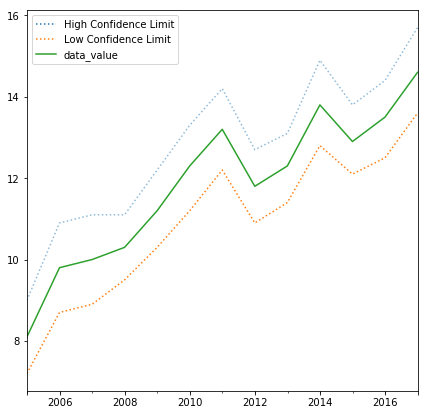

In [8]:
AL_ts = pd.Series(df_crude_prevalence[df_crude_prevalence.LocationAbbr == "AL"]["Data_Value"].values,
                  index=years)
AL_ts = pd.DataFrame({'data_value': AL_ts,
                      'Low Confidence Limit': df_crude_prevalence[df_crude_prevalence.LocationAbbr == "AL"]["Low_Confidence_Limit"].values,
                      'High Confidence Limit': df_crude_prevalence[df_crude_prevalence.LocationAbbr == "AL"]["High_Confidence_Limit"].values})
ax = AL_ts.plot(style=[':', ':', '-'], figsize=(7, 7))
ax.lines[0].set_alpha(0.5)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB47BBE0F0>]], dtype=object)

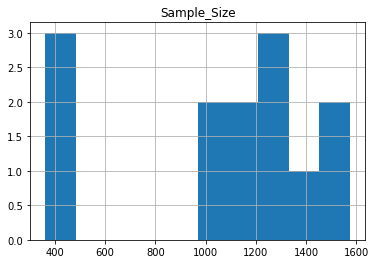

In [86]:
df_crude_prevalence[df_crude_prevalence.LocationAbbr == "AL"].hist(column=["Sample_Size"])

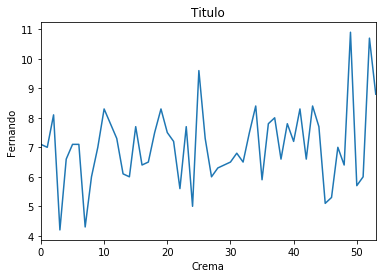

In [31]:
_ = df["Data_Value"].plot().set(xlabel="Crema", ylabel="Fernando", title="Titulo")

## Google Trends Data

### Selecting the Keywords using Text Mining

According to (insert_reference) we can find the important keywords using text mining over resources that talk about diabetes. 

We implement a web scraping method that will work as follows:

1. We will obtain **all** text content from the Wikipedia web page: [Diabetes Mellitus](https://en.wikipedia.org/wiki/Diabetes_mellitus).
1. From the content of original page we will extract the n-grams using the package [NLTK](http://www.nltk.org/) 1-grams, 2-grams, 3-grams and 4-grams. 
1. From this n-grams we will select a group based on our research and extract the data using the [Pytrends API](https://github.com/GeneralMills/pytrends).

In parallel, we will obtain all links inside the original page that are valid wikipedia links of the form: `https://en.wikipedia.org/wiki/{page}` merge all contents and repeat the steps 1, 2 and 3. Later on, as we will have the data from Pytrends we will decide based on the correlation of our results and the ground truth data.


In [12]:
import requests
import inspect
from bs4 import BeautifulSoup

In [13]:
def create_soup_wikipedia(link, language="en"):
    base_url = "https://{}.wikipedia.org/wiki/".format(language) 

    # One petition per url
    r = requests.get(base_url + link)

    # Creating the soup object from Beautiful Soup
    soup = BeautifulSoup(r.content, 'html.parser')
    
    return(soup)

def parse_wikipedia(wiki_url, get_links=True):
    wiki_soup = create_soup_wikipedia(link=wiki_url)
    links, content = [], []

    undesired_content = ['File', 
                        'citation', 
                        'Book', 'book',  
                        'Help', 
                        'Template', 
                        'Wikipedia:Citation_needed', 'wikidata', 'wikipedia' 
                        'Category:CS1_maint', 
                        'Digital_object_identifier',
                        'PubMed', '#', 'Category', 'http']

    for part in wiki_soup.find_all("div", {'class': 'mw-parser-output'}):
        if get_links:
            for link in part.find_all('a'):
                try:
                    if all(list(map(lambda x: x not in link['href'], undesired_content))) and '/wiki/' in link['href']:
                        links.append(link['href'][6:])
                except KeyError:
                    continue
        for paragraph in part.find_all('p'):
            content.append(paragraph.text)
    if get_links:
        return content, links
    else:
        return content

In [14]:
def load_wikipedia_data(filename, itype):
    if itype == "links":
        links = []
    elif itype == "content":
        content = ""
        
    with open(filename, 'r') as f:
        for line in f:
            if itype == "links":
                links.append(line.replace('\n', ''))
            elif itype == "content":
                content += line
                
    return content if itype == "content" else links

### Cleaning data

We now clean the data using the normal process:

1. Transforming all upper characters to lower characters.
1. Removing all stop words in english using the stopwords functionality of nltk.
1. We don't do stemming as we want all words in complete manners.

We give more importance to the words in the original article.

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
import string

In [10]:
def clean_content(content):
    stop_words = set(stopwords.words('english'))
    numbers = '0123456789-–'
    list_of_words = []
    
    for chunk in content:
        for word in wordpunct_tokenize(chunk):
            _word = word.lower()
            if _word not in stop_words:
                if all(list(map(lambda c: c not in string.punctuation and c not in numbers, _word))):
                    list_of_words.append(_word)

    return " ".join(list_of_words)

### Cleaning the principal article

We first, clean the principal article as we want to give more importance to the information inside it.

In [15]:
try:
    diabetes_link = load_wikipedia_data("data/wikipedia/diabetes_links.dat", itype="links")
    diabetes_content = load_wikipedia_data("data/wikipedia/diabetes_content.dat", itype="content")
except FileNotFoundError:
    print("[File Not Found] Downloading data for the first time")
    diabetes_content, diabetes_link = parse_wikipedia(wiki_url="Diabetes_mellitus")
    diabetes_content = clean_content(diabetes_content)

### Cleaning of the rest of articles

To clean the rest of articles, we concatenate the cleaning of every article separated as reduces the memory used.

In [16]:
try:
    rest_articles_content = load_wikipedia_data("data/wikipedia/rest_content.dat", itype="content")
except FileNotFoundError:
    rest_of_content = []
    all_links = set(diabetes_link)
    n = len(all_links)
    for idx, link in enumerate(all_links):
        if idx % 20 == 0:
            print("\r Progress: {}%".format(100*idx/n), end=" ")
        dirty_data = parse_wikipedia(wiki_url=link, get_links=False)
        cleaned_data = clean_content(dirty_data)
        rest_of_content.append(cleaned_data)
        rest_articles_content = " ".join(rest_of_content)

### Saving File for future use

In [17]:
def save_wikipedia_data(content, name, itype="content"):
    with open('data/wikipedia/{}.dat'.format(name), 'w') as f:
        for c in content:
            try:
                f.write(c)
                if itype == "links":
                    f.write('\n')
            except:
                continue

In [127]:
save_wikipedia_data(diabetes_content, "diabetes_content")

In [128]:
save_wikipedia_data(rest_articles_content, "rest_content")

In [130]:
save_wikipedia_data(diabetes_link, "diabetes_links", itype="links")

## Ngrams analysis for principal article

To select our keywords, we will do a n-grams analysis using n = 1, 2, 3, 4. An n-gram is a term with n words that repeats commonly among the content we input.

In [17]:
from nltk import ngrams
from collections import Counter, defaultdict

In [18]:
def get_n_gram(content, n):
    n_grams = ngrams(content.split(), n)
    n_grams = Counter(n_grams)
    return n_grams

def by_result(result_n_gram):
    dict_n_gram = defaultdict(list)
    for name, quantity in result_n_gram:
        dict_n_gram[quantity].append(" ".join(list(name)))
    return dict_n_gram

### 1-grams in principal article

Let's find the principal terms in the article

In [19]:
for idx, values in by_result(get_n_gram(content=diabetes_content, n=1).most_common(40)).items():
    print("{}: {}".format(idx, ", ".join(values)))

136: diabetes
60: insulin, type
43: blood
35: glucose
33: disease
31: may
26: mellitus
23: dm, sugar, people, risk
22: cases
20: high, levels, body
19: increased
17: also
16: term
15: known
14: diabetic
13: include, complications, damage, due, cells, weight
12: loss
11: diet, medications, urine
10: symptoms, cause, several, associated
9: used, however
8: death, long, cardiovascular


### 2-grams in principal article

Let's find the 2-grams in the principal article

In [159]:
for idx, values in by_result(get_n_gram(content=diabetes_content, n=2).most_common(40)).items():
    print("{}: {}".format(idx, ", ".join(values)))

26: type diabetes
23: diabetes mellitus
19: type dm
18: blood sugar
11: high blood
7: sugar levels, cardiovascular disease, blood pressure, people diabetes, blood glucose
6: long term, weight loss, gestational diabetes, citation needed, glucose levels, increased risk, fasting glucose
5: low blood, onset diabetes, beta cells, mg dl, mmol l
4: term complications, diabetes due, million deaths, known diabetic, severe cases, may also, risk diabetes, insulin secretion, physical activity, l mg
3: increased thirst, complications include, kidney disease, damage eyes, cells body, three main, healthy diet, normal body


### 3-grams in principal article

Let's find the 3-grams in the principal article.

In [160]:
for idx, values in by_result(get_n_gram(content=diabetes_content, n=3).most_common(40)).items():
    print("{}: {}".format(idx, ", ".join(values)))

7: blood sugar levels
6: high blood sugar
5: low blood sugar
4: long term complications, mmol l mg, l mg dl
3: normal body weight, diabetes type diabetes, world health organization, risks cardiovascular disease, people type diabetes
2: hyperosmolar hyperglycemic state, chronic kidney disease, three main types, control blood pressure, type dm may, weight loss surgery, loss surgery obesity, estimated million people, million people diabetes, people diabetes worldwide, type dm several, high blood glucose, damage blood vessels, type gestational diabetes, type diabetes mellitus, diabetes mellitus characterized, diabetes mellitus cases, insulin dependent diabetes, type diabetes type, body mass index, lack physical activity, associated increased risk, blood glucose levels, forms diabetes mellitus, levels blood glucose, mg dl mmol, dl mmol l, impaired fasting glucose, glucose mmol l


### 4-gram in principal article

Finally, we print the 4-gram in the principal article.

In [161]:
for idx, values in by_result(get_n_gram(content=diabetes_content, n=4).most_common(40)).items():
    print("{}: {}".format(idx, ", ".join(values)))

4: mmol l mg dl
2: high blood sugar levels, weight loss surgery obesity, million people diabetes worldwide, type diabetes type diabetes, mg dl mmol l, glucose mmol l mg, income communities per population, term type diabetes replaced, type diabetes replaced several, diabetes replaced several former, replaced several former terms, several former terms including
1: diabetes mellitus dm commonly, mellitus dm commonly referred, dm commonly referred diabetes, commonly referred diabetes group, referred diabetes group metabolic, diabetes group metabolic disorders, group metabolic disorders high, metabolic disorders high blood, disorders high blood sugar, blood sugar levels prolonged, sugar levels prolonged period, levels prolonged period symptoms, prolonged period symptoms high, period symptoms high blood, symptoms high blood sugar, high blood sugar include, blood sugar include frequent, sugar include frequent urination, include frequent urination increased, frequent urination increased thirst

## N-gram analysis for rest of content

We see that the number of characters in the rest of articles is extremly high (3 Million words) as a result, we plot the distribution of words to decide the k that we want to use.

### 1-gram analysis for rest of content

#### Plot of the distribution of words

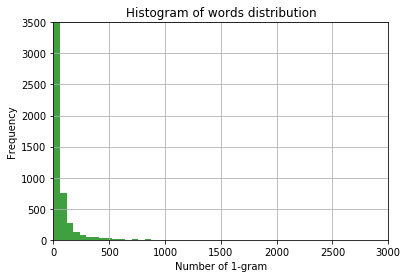

In [162]:
import matplotlib.pyplot as plt
one_gram = get_n_gram(content=rest_articles_content, n=1)

# the histogram of the data
n, bins, patches = plt.hist(one_gram.values(), 50, density=False, facecolor='g', alpha=0.75)


plt.xlabel('Number of 1-gram')
plt.ylabel('Frequency')
plt.title('Histogram of words distribution')
plt.axis([0, 3000, 0, 3500])
plt.grid(True)
plt.show()

We clearly see that the 1-gram distribution follows a power law. Most of the words appear few times and few of the words retain almost all the frequencies. We must select the words that have high appearence and low frequency in the histogram.


In [163]:
for idx, values in by_result(get_n_gram(content=rest_articles_content, n=1).most_common(50)).items():
    print("{}: {}".format(idx, ", ".join(values)))

2913: may
2539: blood
2245: also
2086: insulin
2014: diabetes
1857: glucose
1813: disease
1551: cells
1512: levels
1412: one
1363: used
1288: people
1269: risk
1223: health
1200: type
1152: high
1055: treatment
1001: body
994: cause
963: many
952: first
944: patients
908: symptoms
885: include
873: hormone
871: however, medical
864: often
835: use
833: common
829: two
826: low
824: cell
817: due
782: normal
781: increased
778: found
775: sugar
753: known
739: associated
737: thyroid
728: cases
715: syndrome
673: needed
661: pressure
659: women
639: well
637: years
618: including
608: usually



### 2-gram analysis for rest of content

In [164]:
for idx, values in by_result(get_n_gram(content=rest_articles_content, n=2).most_common(50)).items():
    print("{}: {}".format(idx, ", ".join(values)))

505: type diabetes
482: blood glucose
467: citation needed
392: united states
371: blood pressure
335: blood sugar
306: insulin resistance
303: e g
295: diabetes mellitus
279: glucose levels
245: may also
234: cardiovascular disease
225: long term
223: mg dl
219: high blood
207: open access
174: fatty acids
172: beta cells
164: mmol l
161: heart disease
151: risk factors
149: world health
139: also known, increased risk
135: growth hormone
128: thyroid hormone
127: weight loss
124: trans fats
120: pituitary gland
119: low blood, kidney disease
114: sugar levels
113: blood vessels, trans fat
112: health organization
107: health care
106: nervous system
102: glucose level
97: l mg
94: thyroid gland
93: side effects
91: caesarean section
90: may include
88: also used
87: may cause
85: people diabetes
82: immune system, may occur
81: high levels
79: amino acids


### 3-gram analysis for the rest of data

In [165]:
for idx, values in by_result(get_n_gram(content=rest_articles_content, n=3).most_common(60)).items():
    print("{}: {}".format(idx, ", ".join(values)))

159: blood glucose levels
113: high blood pressure
111: blood sugar levels
98: world health organization
97: l mg dl
96: mmol l mg
59: diabetes mellitus type
58: blood glucose level
54: chronic kidney disease
53: american diabetes association
47: type diabetes mellitus, central nervous system
46: thyroid stimulating hormone, high blood sugar
41: medical citation needed, multiple endocrine neoplasia
40: risk cardiovascular disease
38: low blood sugar, red blood cells
37: food drug administration, coronary artery disease, people type diabetes
36: open access journals
35: body mass index, coronary heart disease
32: congenital adrenal hyperplasia
30: impaired fasting glucose, growth hormone deficiency
29: impaired glucose tolerance
28: stimulating hormone tsh, blood sugar level
27: glucose tolerance test, mg dl mmol, dl mmol l
26: follicle stimulating hormone, world health assembly, embryonic stem cells
24: hormone replacement therapy
22: low blood pressure, corticotropin releasing hormone

### 4-gram analysis for the rest of data

Finally, let's see the 4-gram results.

In [166]:
for idx, values in by_result(get_n_gram(content=rest_articles_content, n=4).most_common(50)).items():
    print("{}: {}".format(idx, ", ".join(values)))

96: mmol l mg dl
28: thyroid stimulating hormone tsh
27: mg dl mmol l
22: insulin like growth factor
21: multiple endocrine neoplasia type
19: food drug administration fda
18: centers disease control prevention
14: level mmol l mg, follicle stimulating hormone fsh, ° c ° f, angiotensin ii receptor antagonists, people high blood pressure, maturity onset diabetes young
13: u food drug administration, autoimmune polyendocrine syndrome type, preventive services task force
12: national institute health clinical, institute health clinical excellence, high blood sugar levels, less mmol l mg, short chain fatty acids
11: insulin resistance type diabetes, body mass index bmi, like growth factor igf
10: latent autoimmune diabetes adults, end stage kidney disease, insulin producing beta cells, range mmol l mg, l mg dl considered, onset diabetes young mody, department health human services
9: low middle income countries, corticotropin releasing hormone crh, magnetic resonance imaging mri, united st

### Downloading the data using the pytrend API

Command to install the necessary package: `pip install pytrends` 

In [95]:
from pytrends.request import TrendReq

In [176]:
key_list = {"1": ["diabetes", "sugar", "glucose", "insulin", "diagnosis"], 
            "2": ["blood pressure", "fruit", "cholesterol", "diet", "type 1"],
            "3": ["type 2", "symptoms", "diabetes mellitus", "diagnosis", "complications"],
            "4": ["osteoporosis", "hypertension","obesity", "fat", "association"],
            "2-grams": ["blood glucose", "heart disease", "cardiovascular disease", "kidney disease", "weigth loss"],
            "3-grams": ["blood glucose level", "high blood pressure", "high blood sugar", "glucose tolerance test", "like growth factor"],
            "3-grams-2": ["central nervous system", "thyroid stimulating hormone", "coronary artery disease", "end stage renal disease", "risk developing diabetes"]
           }

In [ ]:
d_s = '-01-01 '
d_e = '-12-31'
pytrend = TrendReq()
for i in range(2004,2017):
    period = str(i) + d_s + str(i) + d_e
    for key in key_list:
        pytrend.build_payload(kw_list=key_list[key],
                              geo="US",
                              cat = 630,
                              timeframe= period)
        if key == "1":
            interest_by_region_df = pytrend.interest_by_region()
        else:
            interest_by_region_df = pd.concat([interest_by_region_df, pytrend.interest_by_region()], axis = 1)
    file = str(i) + ".csv"
    interest_by_region_df.to_csv("data/pytrends/"+file, sep = ',')

## Transforming Google Trends data into desired format

By now, we have the data separated by years in the form: `State k1 k2 ... kn.` 

Our goal is to create a unified matrix of data of the form: `State Year k1 k2 ... kn`.

In [56]:
import numpy as np

years = np.array([2015]*52)


In [65]:
def concatenate_trends_data():
    trends, counter = [], 1
    
    for year in range(2004, 2017):
        df = pd.read_csv('data/pytrends/{}.csv'.format(year), sep=',')
        row, columnd = df.shape
        df['Year'] = np.array([year]*row)
        df.rename(columns=lambda x: "State" if x == 'Unnamed: 0' else x, inplace=True)
        rest = list(sorted(x for x in set(df.columns) if x is not "Year" and x is not "State"))
        df = df[["State", "Year", ]+rest]
        trends.append(df)
        
    return pd.concat(trends)

In [97]:
keywords = concatenate_trends_data()

### Saving the keywords data

In [ ]:
keywords.to_csv('data/pytrends/keywords.csv')

## NA analysis in keywords data

Before doing the correlation Analysis, we will do a NA analysis in our dataframe. According to [Google Trends Data](https://www.kaggle.com/shakos/google-trends-data-extension/data) an NA may mean:

1. That the data is not available.
1. That the data is actually 0.

As a result, the first and naive approach to select a viable subset of possible keywords is to eliminate those with a lot of NA.

### Deleting columns with a given threshold

We now will create a function that eliminates columns given a certain threshold.

In [155]:
def eliminate_na_columns(df, threshold):
    from math import ceil
    n, c = df.shape
    print("With {} threshold used, we need to have at least {} NA values".format(threshold, ceil(threshold*n)))
    return df.dropna(axis=1, thresh=ceil((1-threshold)*n))

In [156]:
keywords.shape

(663, 37)

In [157]:
keywords.isnull().sum()

State                            0
Year                             0
association                      2
blood glucose                  195
blood glucose level            224
blood pressure                  24
cardiovascular disease         195
central nervous system         539
cholesterol                     24
complications                   58
coronary artery disease        539
diabetes                         0
diabetes mellitus               58
diagnosis                        0
diagnosis.1                     58
diet                            24
end stage renal disease        539
fat                              2
fruit                           24
glucose                          0
glucose tolerance test         224
heart disease                  195
high blood pressure            224
high blood sugar               224
hypertension                     2
insulin                          0
kidney disease                 195
like growth factor             224
obesity             

## Deciding the threshold

To decide the threshold, we first analyze if time is an important factor in the number of NA's as we think internet coverage determines the amount of data we may have.

In [158]:
NA = []
for year in range(2004, 2017):
    NA.append(keywords[keywords.Year == year].isnull().sum())
NA_df = pd.concat(NA, axis=1)
NA_df.rename(columns=lambda x: str(2004+x), inplace=True)
NA_df

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
State,0,0,0,0,0,0,0,0,0,0,0,0,0
Year,0,0,0,0,0,0,0,0,0,0,0,0,0
association,1,1,0,0,0,0,0,0,0,0,0,0,0
blood glucose,15,15,15,15,15,15,15,15,15,15,15,15,15
blood glucose level,24,16,17,20,20,18,18,16,15,15,15,15,15
blood pressure,1,1,3,1,2,3,4,1,1,2,2,3,0
cardiovascular disease,15,15,15,15,15,15,15,15,15,15,15,15,15
central nervous system,49,48,47,42,43,42,40,31,41,40,40,33,43
cholesterol,1,1,3,1,2,3,4,1,1,2,2,3,0
complications,5,5,1,5,2,3,6,3,6,5,5,6,6


### Boxplot of our results

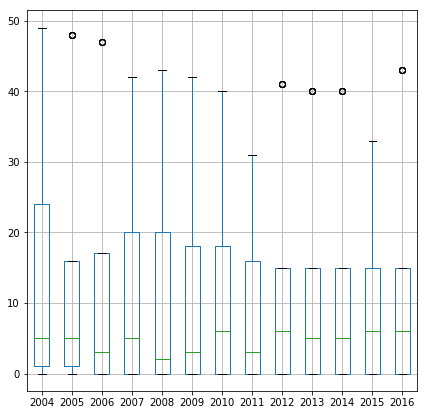

In [159]:
NA_df.boxplot(figsize=(7,7))
plt.show()

We can see that our initial hypothesis was wrong. The number of missing values is not affected by time, therefore, we can discriminate uniformly for all years. Finally, we eliminate the columns with at least 35% NA's. 

In [160]:
keywords_clean = eliminate_na_columns(keywords, threshold=0.35)

With 0.35 threshold used, we need to have at least 233 NA values


In [161]:
keywords_clean.isnull().sum()

State                       0
Year                        0
association                 2
blood glucose             195
blood glucose level       224
blood pressure             24
cardiovascular disease    195
cholesterol                24
complications              58
diabetes                    0
diabetes mellitus          58
diagnosis                   0
diagnosis.1                58
diet                       24
fat                         2
fruit                      24
glucose                     0
glucose tolerance test    224
heart disease             195
high blood pressure       224
high blood sugar          224
hypertension                2
insulin                     0
kidney disease            195
like growth factor        224
obesity                     2
osteoporosis                2
sugar                       0
symptoms                   58
type 1                     24
type 2                     58
weigth loss               195
dtype: int64

### Changing NA's to 0

As we mention, NA can mean data not available or exactly 0. Therefore, we input 0 in all NA values. As a result, we will have a sparse matrix in the features space. A regression approach handling sparse input must be used.

In [162]:
keywords_clean = keywords_clean.fillna(0)

### Analyzing data in columns

We now analyze 

## Correlation Analysis

Before doing the correlation Analysis, we need to transform our ground truth data selecting the same available information regarding spatial and temporal aggregation. By now, we have more information in the ground truth data as we have US total values + dependencies that are not states such as Puerto Rico and Guam.

### Intersection of keywords and ground truth data 

Let's see if the State Key in our ground truth data have the same names as the keywords data

In [196]:
len(set(states).intersection(set(keywords_clean["State"].values)))

51

We now select the rows with same States in our ground truth data, change the name of the identifier of States amnd finally just selecting the prevalence value.

In [210]:
# first change the name of the columns
df_crude_prevalence.rename(columns=lambda x: "State" if x == 'LocationDesc' else x, inplace=True)
df_crude_prevalence.rename(columns=lambda x: "Prevalence" if x == 'Data_Value' else x, inplace=True)
df_crude_prevalence = df_crude_prevalence[["State", "Year", "Prevalence"]]
df_crude_prevalence = df_crude_prevalence.loc[df_crude_prevalence['State'].isin(keywords_clean["State"].values)]
df_crude_prevalence.head()

,State,Year,Prevalence
2,Alabama,2004,8.1
3,Alaska,2004,4.2
4,Arizona,2004,6.6
5,Arkansas,2004,7.1
6,California,2004,7.1


### Merge ground truth data with keywords 

We now merge both dataframes to add the response variable **Prevalence**. To do this, we join both dataframes on the pair (state, year).

In [213]:
df_prevalence_keywords = pd.merge(keywords_clean, df_crude_prevalence, on=["State", "Year"])
df_prevalence_keywords.head()

,State,Year,association,blood glucose,blood glucose level,blood pressure,cardiovascular disease,cholesterol,complications,diabetes,...,kidney disease,like growth factor,obesity,osteoporosis,sugar,symptoms,type 1,type 2,weigth loss,Prevalence
0,Alabama,2004,31.0,16.0,0.0,0.0,0.0,0.0,8.0,59,...,0.0,0.0,0.0,0.0,10,32.0,8.0,16.0,0.0,8.1
1,Alaska,2004,15.0,0.0,0.0,0.0,0.0,0.0,0.0,49,...,0.0,0.0,0.0,0.0,8,0.0,0.0,0.0,0.0,4.2
2,Arizona,2004,48.0,35.0,0.0,0.0,0.0,2.0,3.0,56,...,0.0,0.0,4.0,0.0,5,14.0,9.0,21.0,0.0,6.6
3,Arkansas,2004,10.0,96.0,0.0,0.0,0.0,0.0,0.0,59,...,0.0,0.0,0.0,0.0,4,48.0,0.0,0.0,0.0,7.1
4,California,2004,29.0,47.0,15.0,0.0,1.0,1.0,3.0,57,...,1.0,0.0,5.0,0.0,5,15.0,6.0,22.0,0.0,7.1


### Correlation in Space

We now will analyze the correlation in space. This means that we will create the correlation matrix in which every row will be a State and the columns will be the keywords. Every entry (state, keyword) will be the correlation between the state and the keyword using the function [corrcoef](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) from numpy.


In [275]:
df_crude_prevalence.shape
keywords = [keyword for keyword in df_prevalence_keywords.columns if keyword is not "State" and keyword is not "Year" and keyword is not "Prevalence"]
states = list(set(keywords_clean["State"].values))


In [346]:
dict_correlation_state = {
    keyword: [] for keyword in keywords    
}

dict_correlation_state["States"] = states

for state in states:
    df_state = df_prevalence_keywords[(df_prevalence_keywords.State == state)]
    for keyword in keywords:
        dict_correlation_state[keyword].append(np.corrcoef(df_state[keyword], df_state["Prevalence"])[0,1])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [277]:
df_correlation_state = pd.DataFrame.from_dict(dict_correlation_state).set_index("States").sort_index()
df_correlation_state

,association,blood glucose,blood glucose level,blood pressure,cardiovascular disease,cholesterol,complications,diabetes,diabetes mellitus,diagnosis,...,insulin,kidney disease,like growth factor,obesity,osteoporosis,sugar,symptoms,type 1,type 2,weigth loss
States,,,,,,,,,,,,,,,,,,,,,
Alabama,0.193325,0.556536,NaN,0.445255,NaN,0.427529,-0.218737,0.684322,0.413846,0.423561,...,0.781648,0.094676,NaN,0.502187,0.171871,0.754422,0.340627,0.733156,0.821001,NaN
Alaska,0.029357,NaN,NaN,0.374873,NaN,0.318714,-0.490708,0.822601,NaN,-0.130080,...,0.754765,NaN,NaN,-0.300352,NaN,0.753936,-0.479090,NaN,NaN,NaN
Arizona,0.129777,0.719039,NaN,0.623545,-0.190179,0.032708,-0.145490,0.657732,0.490949,0.144963,...,0.860131,0.468025,NaN,0.736345,0.447821,0.915794,0.452533,0.829593,0.880723,NaN
Arkansas,0.434100,0.425867,NaN,0.405627,0.471961,0.408059,0.095869,0.607123,-0.013593,-0.030005,...,0.879440,0.556073,NaN,0.826077,0.143201,0.921532,-0.425577,0.638355,0.769258,NaN
California,0.287668,0.760761,0.457957,0.553659,-0.516222,0.059501,-0.268303,0.638093,-0.147969,0.703940,...,0.831196,0.697520,NaN,0.647474,0.337031,0.842815,0.693290,0.879822,0.819246,NaN
Colorado,0.488439,0.763977,NaN,0.336756,-0.034811,-0.064678,-0.287024,0.452394,0.008226,0.198949,...,0.763328,0.377471,NaN,0.511544,-0.019589,0.796402,0.672618,0.848831,0.687339,NaN
Connecticut,0.584777,0.438127,NaN,0.084013,-0.200226,-0.048677,-0.288569,0.688396,0.337517,0.443634,...,0.620769,0.231064,NaN,0.566026,0.098486,0.925510,0.213120,0.751747,0.728912,NaN
Delaware,0.379108,NaN,NaN,0.146414,NaN,0.405593,-0.222425,0.782084,-0.136936,0.183656,...,0.691315,NaN,NaN,0.415233,0.177539,0.686528,-0.184493,NaN,NaN,NaN
District of Columbia,-0.206131,0.175814,NaN,0.353372,-0.716400,-0.051893,0.248221,0.177846,0.088918,0.257573,...,0.059816,0.169360,NaN,-0.284149,0.096274,0.259938,0.339505,0.348241,0.229860,NaN


#### Boxplot representation of the correlations

We now plot the boxplot of the correlations. It's important to see that some values inside the correlation matrix are NaN. This refers to the fact that some vectors when we slice over the state will be full of zeros. The boxplot function of pandas takes into account this. As a result, we only visualize the values in which the correlation is different than NaN.

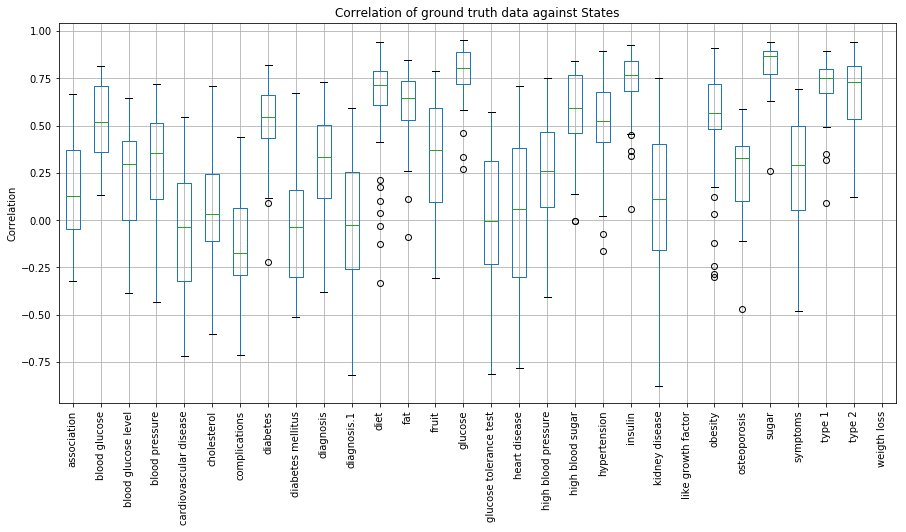

In [379]:
df_correlation_state.boxplot(figsize=(15, 7))
plt.xticks(rotation=90)
plt.title("Correlation of ground truth data against States")
plt.ylabel("Correlation")
plt.show()

#### Which one to select

According to [4], we should select the keywords with a maximum correlation of at least 0.4. Using this approach, would mean that we select all the keywords. As a result, we will be more restrictive in our approach and select the keywords with an average correlation of at least $\alpha$ with $\alpha$ being a desired parameter by the analyst. In our case, we will select 0.4.

In [344]:
def filter_keywords_by_alpha(df, alpha=0.2):
    keywords_passed = []
    for keyword, correlation in df.mean(axis=0, skipna=True).items():
        if correlation >= alpha:
            keywords_passed.append(keyword)
    return keywords_passed
        

In [345]:
keywords_state_passed = []
keywords_state_passed = filter_keywords_by_alpha(df=df_correlation_state)
print("\n".join(keywords_state_passed))

blood glucose
blood glucose level
blood pressure
diabetes
diagnosis
diet
fat
fruit
glucose
high blood pressure
high blood sugar
hypertension
insulin
obesity
osteoporosis
sugar
symptoms
type 1
type 2


### Correlation in time

We now will analyze the correlation in time. This means that we will create the correlation matrix in which every row will be a Year and the columns will be the keywords. Every entry (year, keyword) will be the correlation between the year and the keyword using the function [corrcoef](https://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) from numpy.


In [347]:
years = list(set(df_prevalence_keywords["Year"].values))

In [348]:
dict_correlation_years = {
    keyword: [] for keyword in keywords    
}

dict_correlation_years["Year"] = years

for year in years:
    df_year = df_prevalence_keywords[(df_prevalence_keywords.Year == year)]
    for keyword in keywords:
        dict_correlation_years[keyword].append(np.corrcoef(df_year[keyword], df_year["Prevalence"])[0,1])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3167: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3168: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [352]:
df_correlation_years = pd.DataFrame.from_dict(dict_correlation_years).set_index("Year").sort_index()
df_correlation_years

,association,blood glucose,blood glucose level,blood pressure,cardiovascular disease,cholesterol,complications,diabetes,diabetes mellitus,diagnosis,...,insulin,kidney disease,like growth factor,obesity,osteoporosis,sugar,symptoms,type 1,type 2,weigth loss
Year,,,,,,,,,,,,,,,,,,,,,
2004,-0.193041,0.123598,0.100892,0.064474,0.021309,-0.055870,0.095851,0.015846,-0.059638,-0.024404,...,0.063277,0.081398,NaN,-0.060086,0.160195,0.147830,0.173657,0.184658,0.324630,NaN
2005,0.127342,0.241516,0.211754,0.300984,0.106044,0.130867,-0.183228,0.237074,0.331187,-0.029018,...,0.243083,0.247427,NaN,0.152289,0.114494,0.407484,0.111094,0.256981,0.232120,NaN
2006,0.172905,0.175485,0.204306,0.185550,-0.211977,0.224511,-0.150394,-0.034656,0.377453,-0.126880,...,0.134339,-0.000455,NaN,0.017962,-0.120540,0.559140,-0.048274,0.115512,0.137262,NaN
2007,0.284226,0.336020,0.440353,-0.050305,-0.098773,-0.005630,0.122531,0.139394,0.154639,0.123991,...,-0.066584,0.304834,NaN,0.070487,-0.064788,0.508847,0.457688,0.191829,0.274081,NaN
2008,0.104401,0.426639,0.290444,0.057093,-0.196492,0.112974,0.256682,0.134722,0.175521,-0.112109,...,0.231391,0.212722,NaN,-0.103039,0.106078,0.306665,0.080509,0.368129,0.255769,NaN
2009,0.089768,0.330873,0.223292,0.018368,-0.150599,-0.033486,0.091902,0.149782,0.179463,-0.052011,...,0.214284,0.190580,NaN,-0.262170,-0.048507,0.225829,0.204494,0.333467,0.468616,NaN
2010,-0.073196,0.312786,0.297954,0.154817,-0.015963,0.168047,0.160915,0.205662,0.504088,-0.051002,...,0.174847,0.324056,NaN,-0.079482,-0.062182,0.197590,0.459549,0.278351,0.498644,NaN
2011,0.103663,0.351342,0.126079,0.231067,-0.169899,0.092125,0.136444,0.221796,0.401556,0.028233,...,0.213345,0.420645,NaN,-0.126834,-0.016497,0.515724,0.257488,0.240060,0.377524,NaN
2012,0.190752,0.368728,0.219414,0.321772,0.278334,0.120625,0.431040,0.120344,0.399806,0.139680,...,0.281219,0.298376,NaN,-0.121615,0.092376,0.465507,0.441139,0.439196,0.354134,NaN


#### Boxplot representation of the correlations

We now plot the boxplot of the correlations. It's important to see that some values inside the correlation matrix are NaN. This refers to the fact that some vectors when we slice over the state will be full of zeros. The boxplot function of pandas takes into account this. As a result, we only visualize the values in which the correlation is different than NaN.

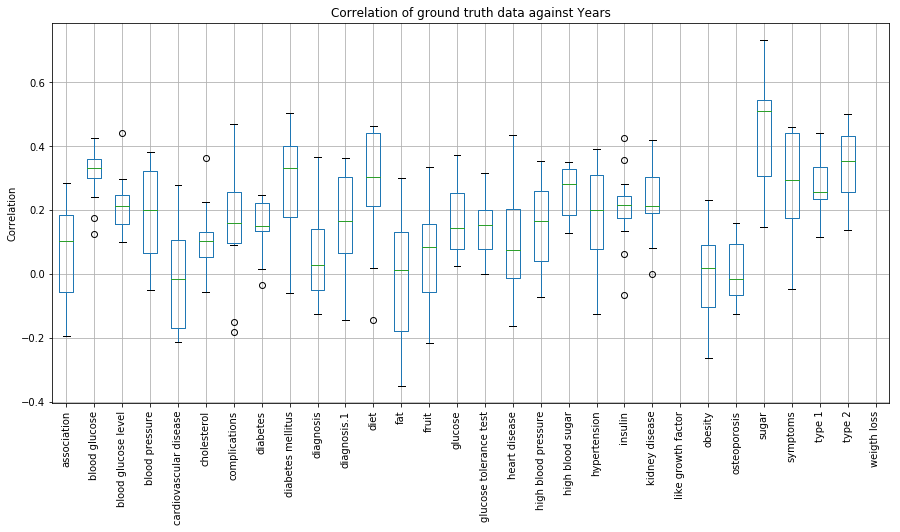

In [350]:
df_correlation_years.boxplot(figsize=(15, 7))
plt.xticks(rotation=90)
plt.title("Correlation of ground truth data against Years")
plt.ylabel("Correlation")
plt.show()

#### Checking Stability over years

We now check the stability of the correlation among years

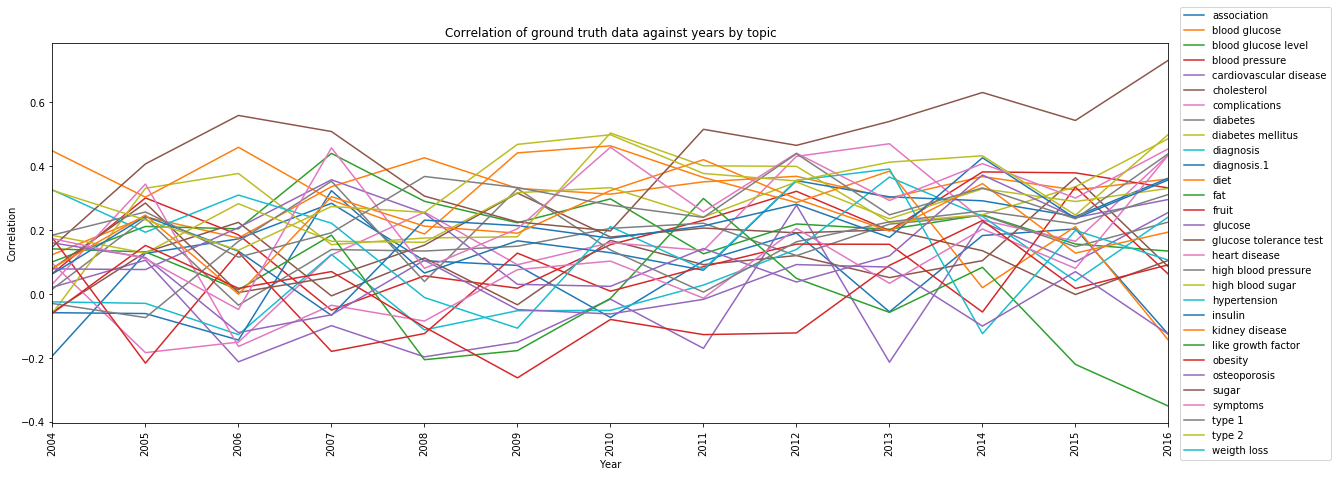

In [374]:
df_correlation_years.plot(figsize=(20, 7))
plt.xticks(years, rotation=90)
plt.title("Correlation of ground truth data against years by topic")
plt.ylabel("Correlation")
plt.legend(loc="center right", bbox_to_anchor=(1.15,0.5))
plt.show()

It's hard to measure the stability in this case as all the correlations by year are almost the same. We analyze the standard deviation for every year and all are between 0.13 and 0.23 with 2016 being the year with the most dispersion.

Finally we can say that the correlation by years have less impact that aggregating by state. This makes sense as Google itself certifies that the data is independent between states. As a result, a geographical aggregation should work better than a yearly based agregation.

In [376]:
df_correlation_years.std(axis=1)

Year
2004    0.135297
2005    0.154205
2006    0.194505
2007    0.183319
2008    0.166444
2009    0.187038
2010    0.176056
2011    0.166785
2012    0.144288
2013    0.166965
2014    0.170101
2015    0.147065
2016    0.235182
dtype: float64

### Which keyword to select

Similar to our spatial aggregation analysis we will now select the keywords that passes a threshold $\alpha$. In this particular case, the $\alpha$ should be smaller because the correlation values are smaller.

In [384]:
keywords_year_passed = []
keywords_year_passed = filter_keywords_by_alpha(df=df_correlation_years, alpha=0.15)
print("\n".join(keywords_year_passed))

blood glucose
blood glucose level
blood pressure
complications
diabetes
diabetes mellitus
diagnosis.1
diet
glucose
high blood pressure
high blood sugar
hypertension
insulin
kidney disease
sugar
symptoms
type 1
type 2


### Poverty Data

In [18]:
with open("data/data_poverty/poverty.txt") as f:
    content = f.readlines()
    
dict_poverty = {"State": [], "Year":[], "Percent_Poverty": [] }
for line in content:
    try:
        year = int(line)
    except:
        lst = line.split(" ")
        if lst[0] != "STATE":
            dict_poverty["State"].append(lst[0])
            dict_poverty["Percent_Poverty"].append(lst[4])
            dict_poverty["Year"].append(year)
            
df_poverty = pd.DataFrame(data = dict_poverty, columns=["State", "Year", "Percent_Poverty"])

In [19]:
df_poverty.head(5)

,State,Year,Percent_Poverty
0,Alabama,2016,"16,2"
1,Alaska,2016,"12,6"
2,Arizona,2016,"16,1"
3,Arkansas,2016,"16,0"
4,California,2016,"13,9"
